In [1]:
""" @author: bhushan
    
    We called the following experiment the Normal Experiment so some of the variables have been named accordingly.
    Later, I made the pivot to name it the Synthetic Data Experiment because I thought that was more aptly suited to 
    this. Any mention of "normal" outputs/inputs/experiments should mean this synthetic data experiment.
    
    The cleaned_normal_outputs dir is in Dropbox in Experimental > normal/synthetic_experiment
"""
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from synthetic_data_experiment_functions import *

**Important differences between ToyMultiAttribute (TMA) Outputs and these plots:**
* The inputs and outputs here are integers whereas the TMA ones are floats.
* The outputs of TMA have only two races. The runs here have 2 races as inputs but > 2 races as outputs.
* The TMA plots are made of 1000 runs each, these are 100 runs each. (Because of time constraints. 100 runs takes about an hour on AWS. These 12 plots took about 12 hours.)

**Something Fishy:**
* For small tree sizes, the population is distributed very unevenly. I believe this is the reason why there is so much variance in the plots above.

In [2]:
state_id = 1
race = 1
num_runs = 100
data_dir = "./cleaned_normal_outputs/"

experiment2coords_map = dict({
    "11": (0,2),
    "12": (0,1),
    "13": (0,0),
    "21": (1,2),
    "22": (1,1),
    "23": (1,0),
    "31": (2,2),
    "32": (2,1),
    "33": (2,0),
    "41": (3,2),
    "42": (3,1),
    "43": (3,0)
})

for (key, coords) in experiment2coords_map.items():
    print(key, coords)

11 (0, 2)
12 (0, 1)
13 (0, 0)
21 (1, 2)
22 (1, 1)
23 (1, 0)
31 (2, 2)
32 (2, 1)
33 (2, 0)
41 (3, 2)
42 (3, 1)
43 (3, 0)


In [3]:
def plot_experiments(data_dir, experiment2coords_map, er=True):
    fig, axs = plt.subplots(4, 3, figsize=(20,20))
    
    for (key, coords) in experiment2coords_map.items():
        dir_name = data_dir + "NORMAL_CONFIG_" + key + ".ini/"
        runs_df = collect_run_percents_by_race(dir_name, state_id, race)
        if er: 
            plot(runs_df, num_runs, axs, coords)
        else:
            plot(runs_df, num_runs, axs, coords, hist=True)

    # Label the budget and the splits to the figure
    axs[0, 0].set_title("Splits[0.75, 0.125, 0.125]")
    axs[0, 1].set_title("Splits[0.125, 0.75, 0.125]")
    axs[0, 2].set_title("Splits[0.125, 0.125, 0.75]")

    pad = 5
    axs[0,0].annotate("Budget:0.25", xy=(0, 0.5), xytext=(-axs[0,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[0,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[1,0].annotate("Budget:0.50", xy=(0, 0.5), xytext=(-axs[1,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[1,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[2,0].annotate("Budget:1.00", xy=(0, 0.5), xytext=(-axs[2,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[2,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')
    axs[3,0].annotate("Budget:2.00", xy=(0, 0.5), xytext=(-axs[3,0].yaxis.labelpad - pad, 0),
                        xycoords=axs[3,0].yaxis.label, textcoords='offset points',
                        size='large', ha='right', va='center')

    return fig

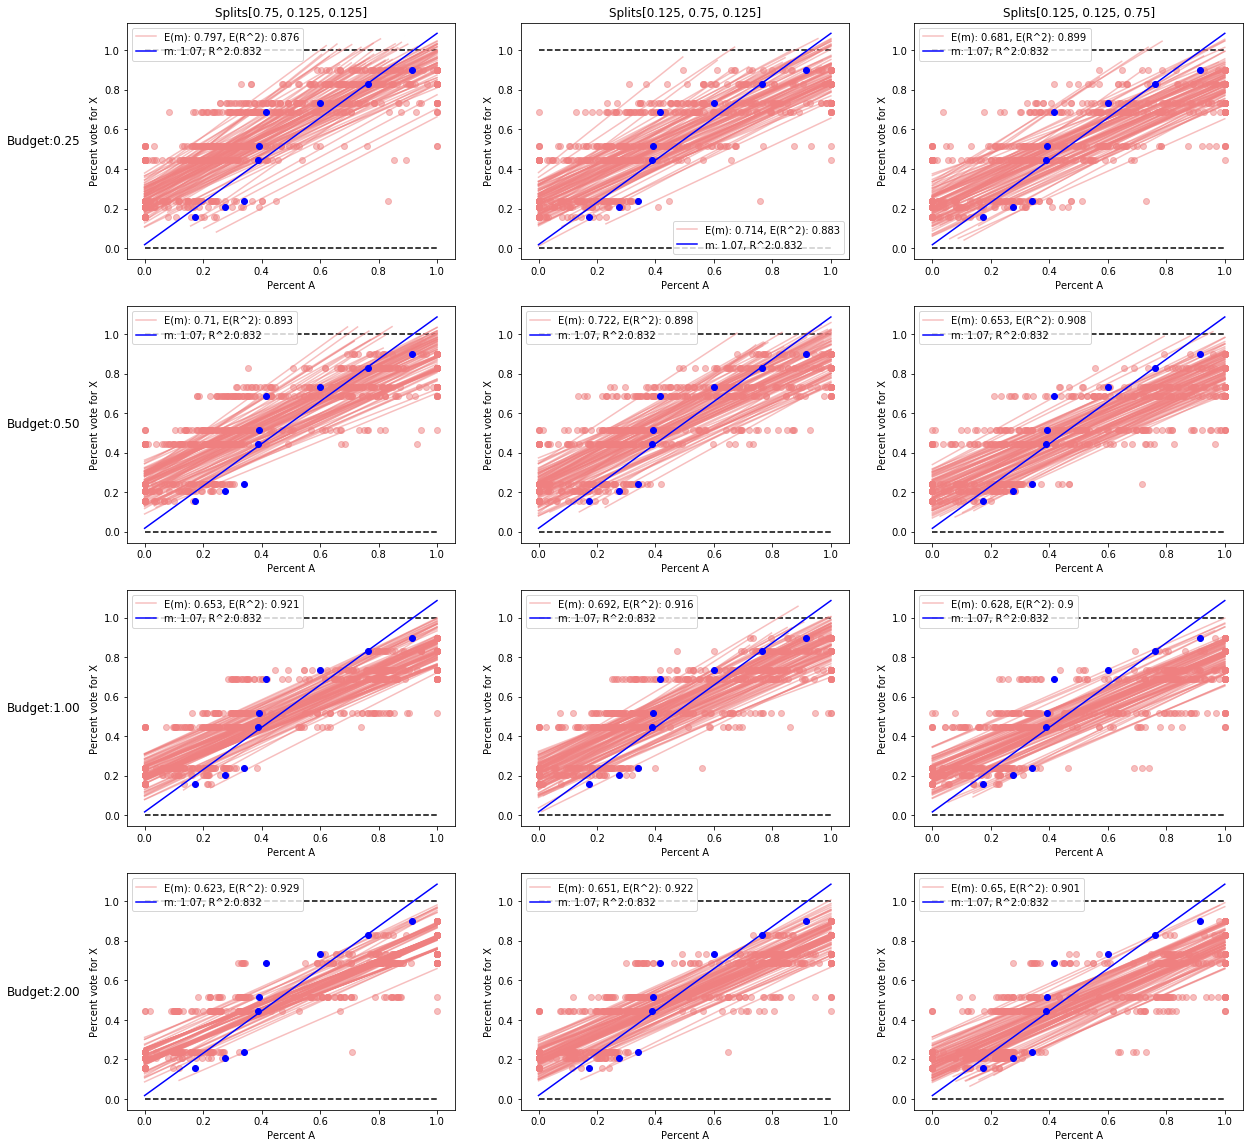

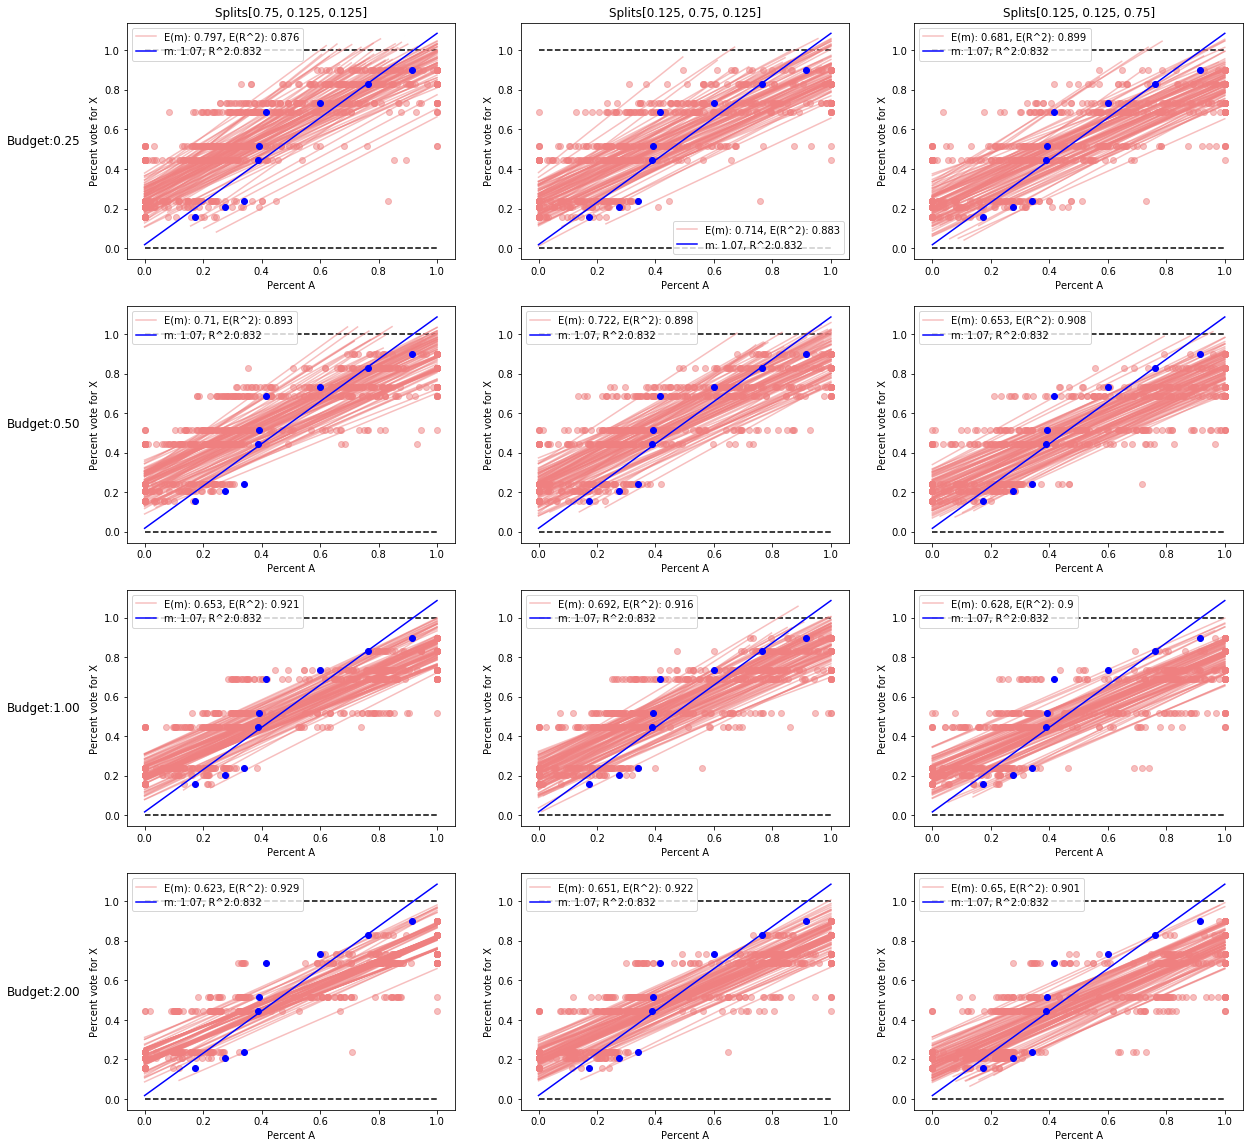

In [4]:
er_fig = plot_experiments(data_dir, experiment2coords_map, er=True)
er_fig

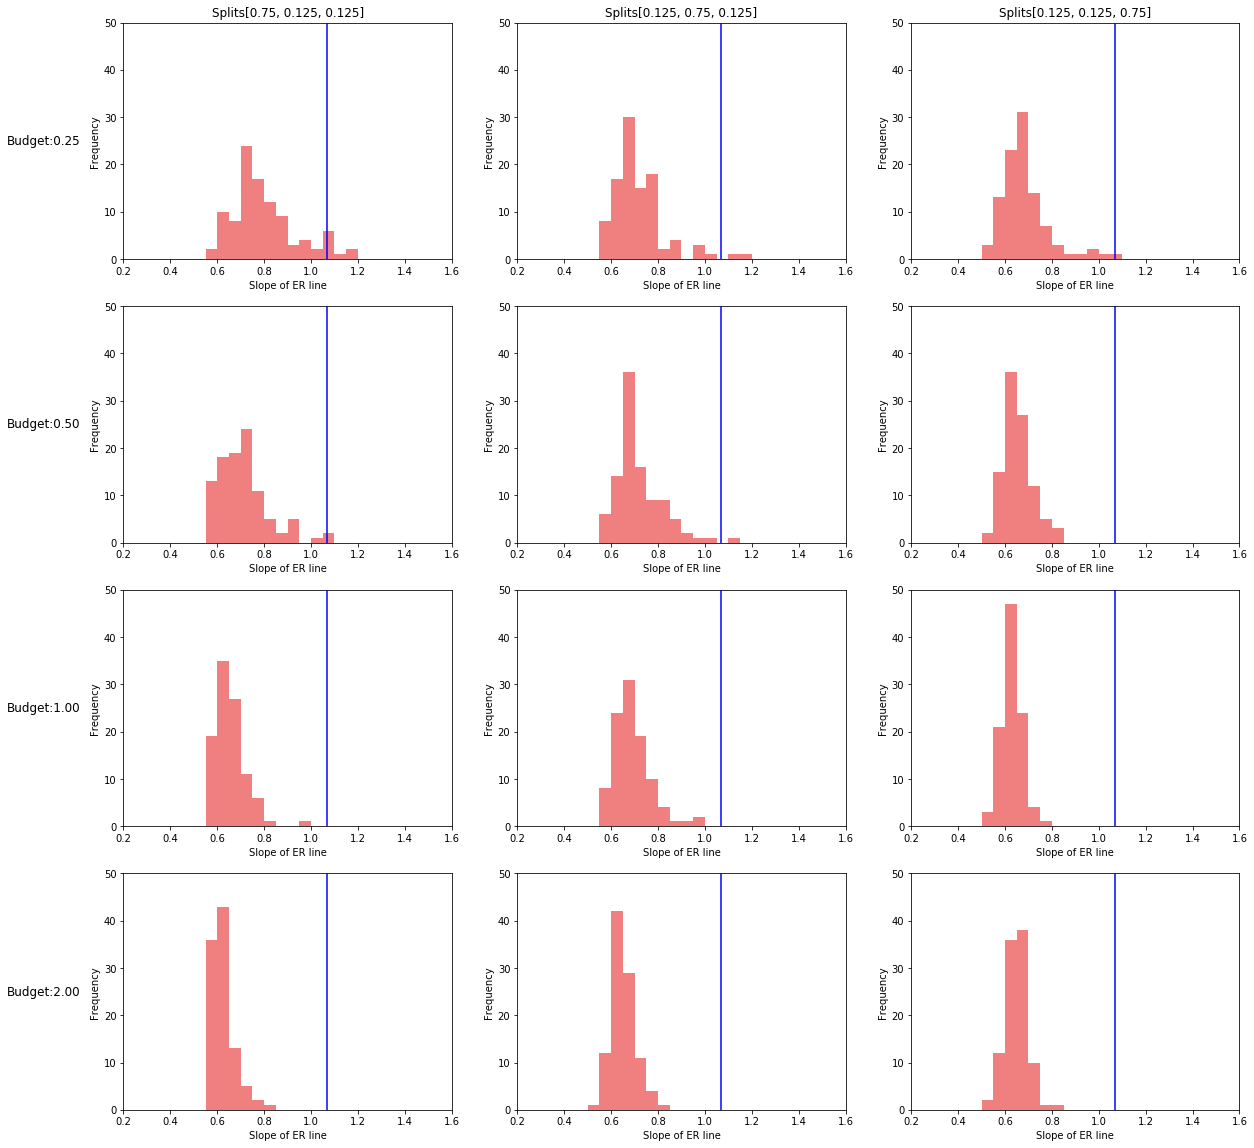

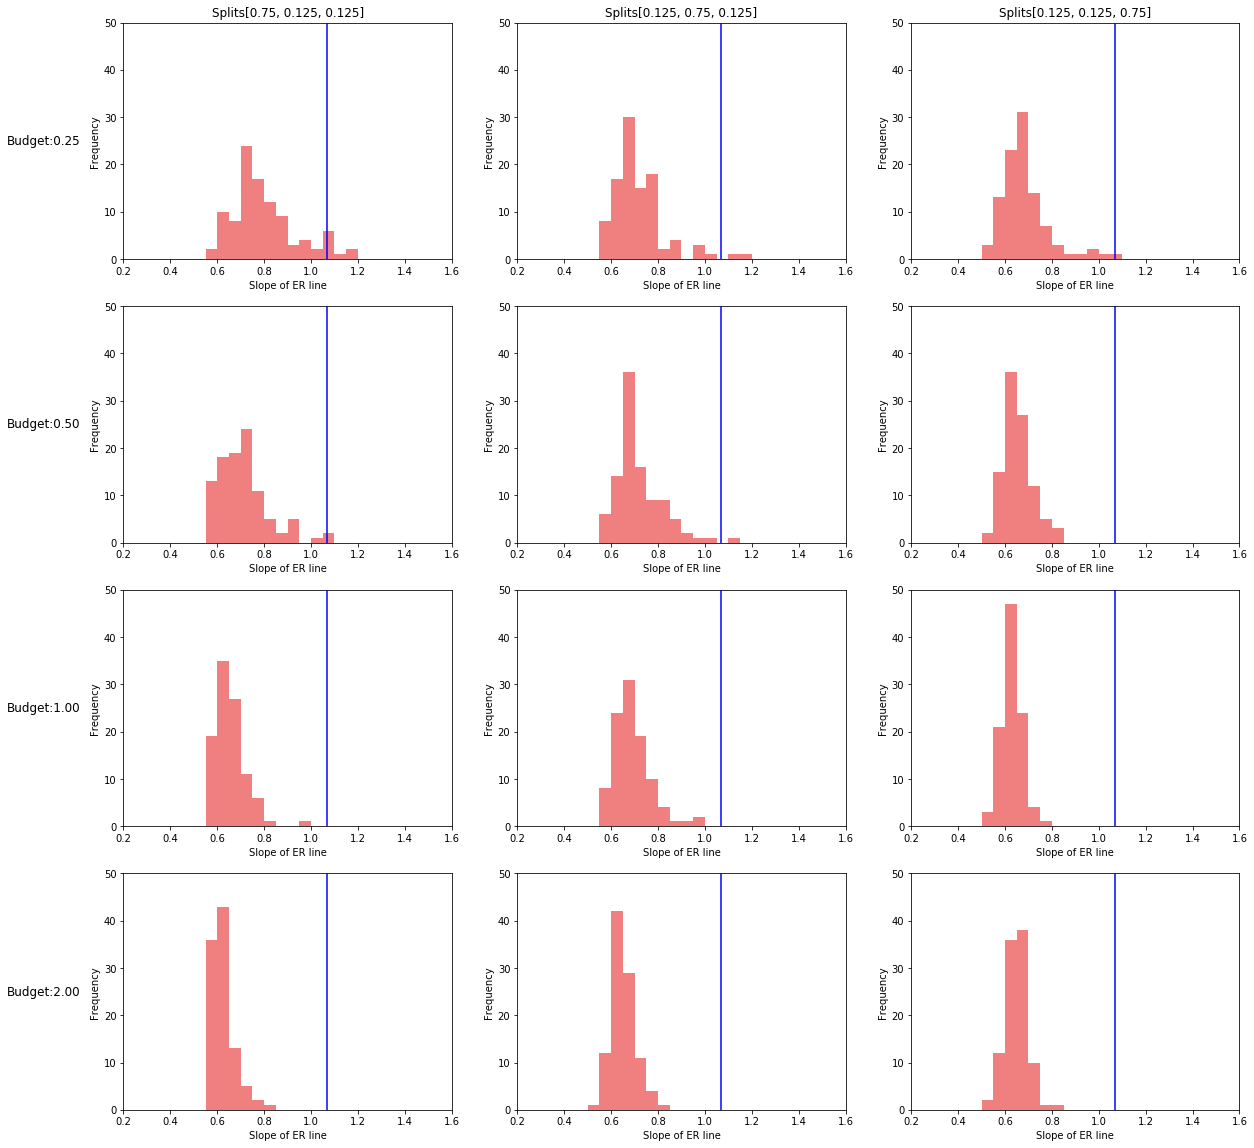

In [5]:
hist_fig = plot_experiments(data_dir, experiment2coords_map, er=False)
hist_fig

In [6]:
er_fig.savefig("synthetic_data_ER.pdf")
# The best strategy I have found to generate high quality pngs is to save the figure as a PDF and then run 
# the following line on the command line. TODO: there needs to be a cleaner way to do this.
# pdftoppm -png -r 300 synthetic_data_ER.pdf synthetic_data_ER

hist_fig.savefig("synthetic_data_hists.pdf")
# The best strategy I have found to generate high quality pngs is to save the figure as a PDF and then run 
# the following line on the command line. TODO: there needs to be a cleaner way to do this.
# pdftoppm -png -r 300 synthetic_data_hists.pdf synthetic_data_hists